In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from math import atan, degrees

# Import Data

In [2]:
def create_df(path, disp=True):
    df_data = []
    df_index = []
    for filename in os.listdir(path):
        name = filename.split('.')
        if name[-1] == 'json':

            # load data
            f = open(path + filename, 'r')
            content = f.read()
            a = json.loads(content)
            f.close()

            if not len(a['people']):
                continue

            data = a['people'][0]['pose_keypoints_2d']

            # normalize
            coords = np.array([[data[i*3],data[i*3+1]] for i in range(25)])
            coords -= coords[1] # center around point 1
            coords /= max(abs(coords.reshape(-1))) # normalize

            # filter keypoints with poor confidence scores
            scores = [data[i*3+2] for i in range(25)]
            for k in range(len(scores)):
                if not scores[k]:
                    coords[k] = [-1,-1]

            # add to dataset
            df_index.append(int(name[0][5:-10])//5)
            df_data.append(list(coords.reshape(-1)))

    df_data = np.array(df_data).T
    print(df_data.shape)
    
    df_dict = {}
    for i in range(25):
        df_dict['x'+str(i)] = [k for k in df_data[i*2]]
        df_dict['y'+str(i)] = [k for k in df_data[i*2+1]]
    df_dict['frame'] = df_index

    df = pd.DataFrame(df_dict)
    df.set_index('frame', inplace=True)
    df.sort_values(by=['frame'], inplace=True)
    if disp:
        display(df)
    
    return df

In [3]:
df = create_df('train_falling/')

(50, 15)


,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,x20,y20,x21,y21,x22,y22,x23,y23,x24,y24
frame,,,,,,,,,,,,,,,,,,,,,
0,0.041789,-0.119418,0.0,0.0,-0.126097,-0.000019,-0.237981,0.174687,-0.321708,0.342513,...,-0.021104,0.894965,-0.097878,0.860158,-0.028056,1.000000,-0.076912,0.993130,-0.070116,0.951257
1,0.054679,-0.123227,0.0,0.0,-0.116508,-0.000073,-0.185035,0.177919,-0.136938,0.321744,...,0.116413,0.986299,0.041032,0.945158,-0.095969,0.959123,-0.143855,0.952031,-0.109738,0.917782
2,0.047789,-0.095273,0.0,0.0,-0.115689,-0.000253,-0.176941,0.156524,-0.081698,0.265386,...,0.129595,0.986617,0.075088,0.952509,-0.169823,0.918600,-0.210781,0.911601,-0.190542,0.870856
3,0.048107,-0.110333,0.0,0.0,-0.117202,-0.006819,-0.193042,0.179496,-0.206698,0.365573,...,0.055411,0.992998,-0.013683,0.931162,-0.165574,0.937889,-0.206936,0.923986,-0.186058,0.875842
4,0.060667,-0.100797,0.0,0.0,-0.120693,-0.000178,-0.228295,0.167699,-0.335715,0.335282,...,0.013527,0.966530,-0.040261,0.919604,-0.000009,1.000000,-0.046650,0.993522,-0.046757,0.953252
5,0.041059,-0.108804,0.0,0.0,-0.122428,-0.006482,-0.265052,0.142985,-0.401161,0.292759,...,-0.081387,0.952522,-0.122401,0.898165,0.013840,1.000000,-0.033855,0.993094,-0.027057,0.945570
6,0.040860,-0.114820,0.0,0.0,-0.128264,-0.006574,-0.243076,0.162362,-0.337575,0.331100,...,-0.053935,0.939222,-0.101279,0.837916,-0.013219,1.000000,-0.047155,0.986566,0.000260,0.939159
7,0.027460,-0.103679,0.0,0.0,-0.117418,0.006700,-0.193097,0.192914,-0.213655,0.372463,...,0.165390,0.958380,0.075944,0.903342,-0.061867,1.000000,-0.096548,0.979186,-0.013620,0.923946
8,0.008330,-0.105636,0.0,0.0,-0.138168,-0.008157,-0.211153,0.195011,-0.243502,0.398146,...,0.073416,0.991584,-0.007834,0.975269,-0.227230,0.983588,-0.267887,0.959041,-0.203211,0.894148


# Visualize Sequence

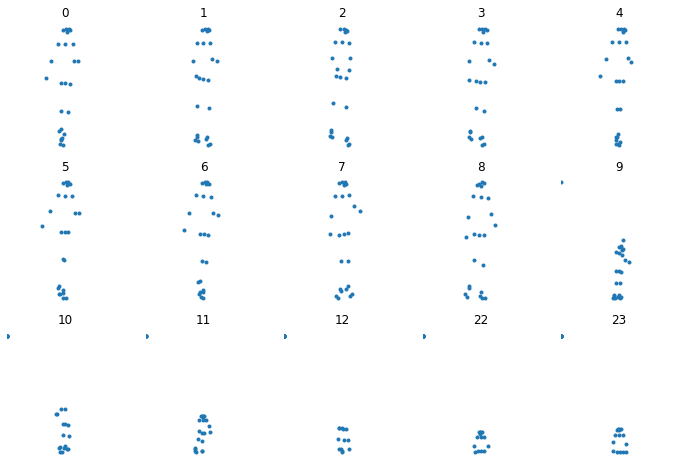

In [4]:
fig = plt.figure(figsize=(12,8))

for i in df.index:
    idx = list(df.index).index(i)
    x = [df.iloc[idx,k*2] for k in range(25)]
    y = [-df.iloc[idx,k*2+1] for k in range(25)] 
    fig.add_subplot(3, 5, idx+1)    
    plt.scatter(x, y, marker='.')
    plt.title(i)
    plt.xlim(-1,1)
    plt.axis("off")

plt.show()

# Establish Conditions

In [5]:
# Condition 1
v = {}
y8_prev = df.loc[0,'y8']
prevs, currs = [None], [y8_prev]
for i in df.index: 
    y8_curr = df.loc[i,'y8']
    if i: 
        prevs.append(y8_prev)    
        currs.append(y8_curr)
        v[i] = y8_curr - y8_prev                
    else:
        v[i] = None
    y8_prev = y8_curr

vdf = pd.DataFrame({
    'frame': v.keys(),
    'v': v.values(),
    'prev': prevs,
    'curr': currs,
})
vdf.set_index('frame', inplace=True)
display(vdf)

,v,prev,curr
frame,,,
0,NaN,NaN,0.391655
1,-0.042362,0.391655,0.349293
2,-0.009126,0.349293,0.340166
3,0.039190,0.340166,0.379357
4,0.003065,0.379357,0.382422
5,-0.028652,0.382422,0.353770
6,0.018038,0.353770,0.371807
7,0.000464,0.371807,0.372271
8,0.001457,0.372271,0.373728


In [6]:
# Condition 2
theta = {}
for i in df.index:
    x0, y0 = df.loc[i,'x0'], df.loc[i,'y0']
    x10, y10 = df.loc[i,'x10'], df.loc[i,'y10']
    x13, y13 = df.loc[i,'x13'], df.loc[i,'y13']
    xbar = (x10 + x13) / 2
    ybar = (y10 + y13) / 2
    theta[i] = degrees(atan(abs((y0-ybar)/(x0-xbar))))

thetadf = pd.DataFrame({
    'frame': theta.keys(),
    'theta': theta.values(),
})
thetadf.set_index('frame', inplace=True)
display(thetadf)

,theta
frame,
0,86.442332
1,85.049048
2,83.153388
3,85.362828
4,84.627848
5,84.925604
6,87.420966
7,88.399263
8,86.586442


In [7]:
# Condition 3
ratio = {}
widths, heights = [], []
for i in df.index:
    coords = np.array(list(df.loc[i,:])).reshape(-1,2)
    
    # account for faulty keypoint
    for k in range(len(coords)):
        if coords[k][0] == -1 and coords[k][1] == -1:
            coords[k] = [0,0]
            
    width = max(coords[:,0]) - min(coords[:,0])
    height = max(coords[:,1]) - min(coords[:,1])
    ratio[i] = width / height
    widths.append(width)
    heights.append(height)

ratiodf = pd.DataFrame({
    'frame': ratio.keys(),
    'ratio': ratio.values(),
    'width': widths,
    'height': heights,
})
ratiodf.set_index('frame', inplace=True)
display(ratiodf)

,ratio,width,height
frame,,,
0,0.475543,0.545547,1.147207
1,0.359448,0.411241,1.144091
2,0.313441,0.353968,1.129294
3,0.381875,0.434502,1.137812
4,0.482177,0.543853,1.127910
5,0.568939,0.646234,1.135857
6,0.511601,0.580813,1.135285
7,0.457144,0.517139,1.131239
8,0.446722,0.512080,1.146304


# Combined Logic

In [8]:
isFallEvent = []
M1, M2, M3 = False, False, False
for i in df.index:
    v = vdf.loc[i,'v']
    theta = thetadf.loc[i,'theta']
    ratio = ratiodf.loc[i,'ratio']
    if v<-0.09:
        M1 = True
    if M1 and theta<55 and ratio>1:
        isFallEvent.append(1)
    else:
        isFallEvent.append(0)

combined_df = pd.DataFrame({
    'frame': vdf.index,
    'v': vdf.v,
    'theta': thetadf.theta,
    'ratio': ratiodf.ratio,
    'isFallEvent': isFallEvent,
})
combined_df.set_index('frame', inplace=True)
display(combined_df)

,v,theta,ratio,isFallEvent
frame,,,,
0,NaN,86.442332,0.475543,0
1,-0.042362,85.049048,0.359448,0
2,-0.009126,83.153388,0.313441,0
3,0.039190,85.362828,0.381875,0
4,0.003065,84.627848,0.482177,0
5,-0.028652,84.925604,0.568939,0
6,0.018038,87.420966,0.511601,0
7,0.000464,88.399263,0.457144,0
8,0.001457,86.586442,0.446722,0


# Testing

### Falling

In [29]:
test_falling_df = create_df('test_falling/')

(50, 23)


,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,x20,y20,x21,y21,x22,y22,x23,y23,x24,y24
frame,,,,,,,,,,,,,,,,,,,,,
1,-0.000511,-0.120505,0.0,0.0,-0.086682,0.000264,-0.172871,0.189333,-0.068792,0.275945,...,0.016621,0.965930,-0.017396,0.930503,-0.051889,1.000000,-0.086700,0.999718,-0.068792,0.948428
2,-0.048464,-0.082344,0.0,0.0,-0.114799,-0.000117,-0.229045,0.113978,-0.179776,0.179692,...,0.049655,0.999614,0.016378,0.950295,-0.130356,0.999832,-0.164152,0.983421,-0.114028,0.950781
3,-0.015149,-0.111858,0.0,0.0,-0.126049,-0.000130,-0.206277,0.159092,-0.221979,0.349294,...,-0.047364,1.000000,-0.095247,0.936886,-0.190316,0.810057,-0.221962,0.778395,-0.158670,0.762011
4,0.015434,-0.105750,0.0,0.0,-0.106353,-0.029599,-0.196932,0.060948,-0.091089,0.046350,...,-0.060391,0.954146,-0.151403,0.893801,-0.060128,1.000000,-0.106415,0.999923,-0.121540,0.954502
5,0.028566,-0.128306,0.0,0.0,-0.142509,-0.014217,-0.186139,0.199845,-0.114527,0.328662,...,0.029048,0.899676,-0.042579,0.814197,-0.242891,1.000000,-0.299965,0.985987,-0.271472,0.929104
6,0.037659,-0.087935,0.0,0.0,-0.137035,-0.024812,-0.237588,0.137956,-0.274953,0.312574,...,0.037723,0.987818,-0.037544,0.950312,-0.299841,0.638020,-0.287429,0.625249,-0.249987,0.550008
7,0.063111,-0.113729,0.0,0.0,-0.101910,-0.000013,-0.165228,0.190032,-0.126947,0.328837,...,-0.101974,0.873532,-0.152308,0.785099,0.126338,0.987818,0.075733,1.000000,0.050489,0.961952
8,0.020461,-0.041114,0.0,0.0,-0.040822,-0.000088,-0.057215,0.061245,-0.016289,-0.008215,...,-1.000000,-1.000000,0.020444,0.196128,0.028526,0.347428,0.004177,0.347537,0.004185,0.327122
9,0.029068,-0.067955,0.0,0.0,-0.106980,-0.009630,-0.204023,0.174428,-0.106772,0.291435,...,0.203635,0.980830,0.116352,0.980492,-0.213424,0.970882,-0.233101,0.980572,-0.223352,0.941725


In [24]:
def get_conditions(df):
    v, theta, ratio = {}, {}, {}
    for i in df.index:   
        
        # Condition 1
        if df.index[0] == i:
            y8_prev = df.loc[i,'y8']
            v[i] = None
        else:
            y8_curr = df.loc[i,'y8']
            v[i] = y8_curr - y8_prev
            y8_prev = y8_curr
        
        # Condition 2
        x0, y0 = df.loc[i,'x0'], df.loc[i,'y0']
        x10, y10 = df.loc[i,'x10'], df.loc[i,'y10']
        x13, y13 = df.loc[i,'x13'], df.loc[i,'y13']
        xbar = (x10 + x13) / 2
        ybar = (y10 + y13) / 2
        theta[i] = degrees(atan(abs((y0-ybar)/(x0-xbar))))

        # Condition 3
        coords = np.array(list(df.loc[i,:])).reshape(-1,2)
        for k in range(len(coords)):
            if coords[k][0] == -1 and coords[k][1] == -1:
                coords[k] = [0,0]
        width = max(coords[:,0]) - min(coords[:,0])
        height = max(coords[:,1]) - min(coords[:,1])
        ratio[i] = width / height
    
    return v, theta, ratio

In [25]:
v, theta, ratio = get_conditions(test_falling_df)

In [27]:
def check_falling(df, v, theta, ratio):
    isFallEvent = []
    M1, M2, M3 = False, False, False
    for i in df.index:
        if v[i] and v[i]<-0.09:
            M1 = True
        if M1 and theta[i]<55 and ratio[i]>1:
            isFallEvent.append(1)
        else:
            isFallEvent.append(0)

    test_res = pd.DataFrame({
        'frame': df.index,
        'v': v.values(),
        'theta': theta.values(),
        'ratio': ratio.values(),
        'isFallEvent': isFallEvent,
    })
    test_res.set_index('frame', inplace=True)
    display(test_res)

In [28]:
check_falling(test_falling_df, v, theta, ratio)

,v,theta,ratio,isFallEvent
frame,,,,
1,NaN,89.398910,0.318873,0
2,-0.001839,89.391551,0.338083,0
3,-0.010705,86.269470,0.347275,0
4,-0.030274,86.362597,0.320557,0
5,0.037857,82.460387,0.450082,0
6,-0.006767,82.326302,0.444776,0
7,-0.008557,85.806422,0.311555,0
8,-0.214799,89.560818,0.371115,0
9,0.203336,85.572272,0.487136,0


### Walking

In [30]:
test_walking_df = create_df('test_walking/', disp=False)
v, theta, ratio = get_conditions(test_walking_df)
check_falling(test_walking_df, v, theta, ratio)

(50, 25)


,v,theta,ratio,isFallEvent
frame,,,,
0,NaN,85.341941,0.367905,0
1,-0.053218,84.495698,0.224567,0
2,0.008833,84.560545,0.322012,0
3,0.004567,83.174376,0.543726,0
4,0.017936,83.577042,0.473704,0
5,0.000095,84.999532,0.239720,0
6,-0.024397,82.680857,0.380099,0
7,-0.024201,84.569242,0.471015,0
8,-0.015587,87.846591,0.250131,0
